In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import scipy.signal
import colorsys
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib.ticker import MultipleLocator
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
np.random.seed(1)

1. styles (the look)
- white background with only horizontal gray grid lines (as the first figure below)
- solid black lines for boxplots (as second figure below)
- translucent scattered raw data superimposed on boxplots (we all use blue color, similar dot size as the second figure below)
- y-axis is absolute error in N
- We are not limited to python, we can also use excel to draw if easier.
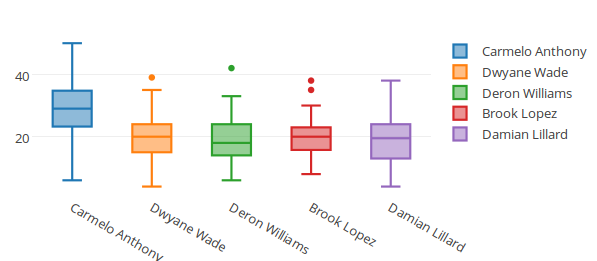 

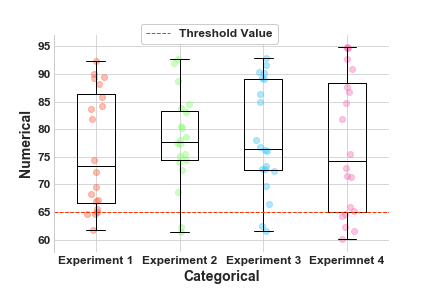

2. How many figures?
- For on-desk measurement, the Experiment No.s are 1,2,3,4,5,6,7,8,9. For each ExpNo, we have data of calibration 1 (1 file) and calibration 2 methods (5 files for 5 tirals, since calib 2 is trained and tested within the same trial. details in paper). But we want to make only 6 figures, details follow.
    - 1 metal thin, 2 metal medium, 3 metal thick. 
    - 4 plastic thin, 5 pls med, 6 pls thick. 
    - 7 wood THICK, 8 med, 9 THIN 
    - we want only two figures out of the three thin/med/thick plates of the same material. 
    - for calib 1, we want to group the dots of error under the same calibration method, across thin/med/thick plates (e.g. Exp = 1,2,3 for metal). 
    - for calib 2, calibration 2 is done per trial, so we wanna group trials first. After that, we average across different levels of thickness. 
    - In summary, one material (e.g. metal, including 1&2&3) will generate two figures, one is for calibration 1, one is for calibration 2. In total, we have 3 materials *(1+1) = 6 figures here. 
- For super-long distance measurement, the Experiment No.s are 22,23,24,25. For each ExpNo, we have data of calibration 1 (1 file) and calibration 2 methods (5 files for 5 tirals, since calib 2 is trained and tested within the same trial. details in paper). But we want to make only 8 figures, details follow.
    - 22 8m, 23 6m, 24 4m, 25 2m
    - we want only two figures out of each distance. They are all measure on metal medium plate, so no worries about the material.
    - for calib 1, we want to group the dots of error under the same calibration method, across thin/med/thick plates (e.g. Exp = 1,2,3 for metal). 
    - for calib 2, calibration 2 is done per trial, so we wanna group trials first. After that, we average across different levels of thickness. 
    - In summary, one distance will generate two figures, one is for calibration 1, one is for calibration 2. In total, we have 4 distances *(1+1) = 8 figures here. 

3. The layout
- For on-desk measurement
    - We want to plot it with subplots(2,3), one row is one calibration, one column is one material. 
    - The y-axis scale is absolute error rather than error percentage now. We want to set the same ylim (range of y-axis) for one calibration method across all materials.
- For super-long distance measurement
    - We want to plot it with subplots(2,4), one row is one calibration, one column is one distance. That will be so clean and beautiful!
    - The y-axis scale is absolute error rather than error percentage now. We want to set the same ylim (range of y-axis) for one calibration method across all materials.

# calibration 1 (the code for original figures)


## incidence angles

### group all 20,40,60 errors for each angles

<class 'numpy.ndarray'>
0.074938281171991 	 0.14627595533315635


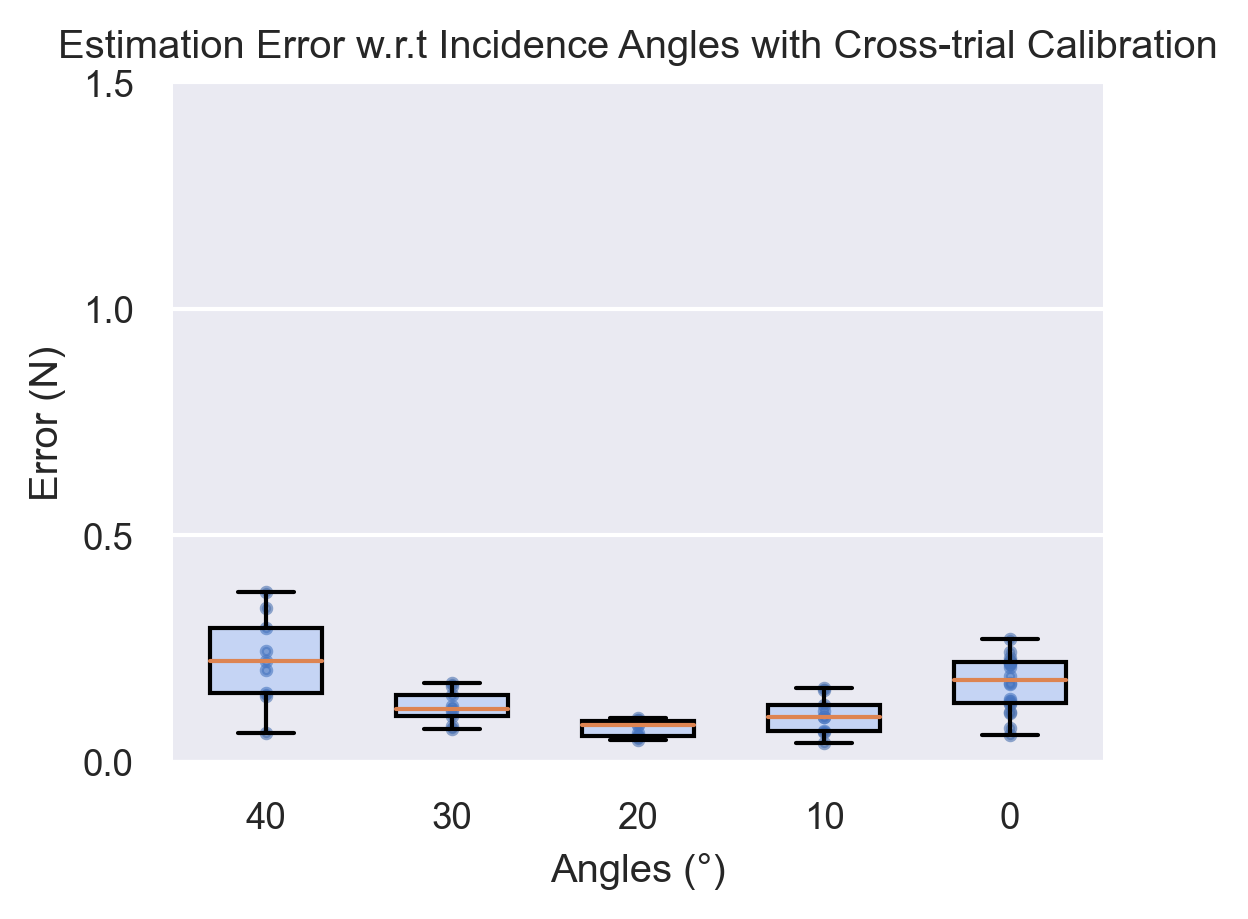

In [19]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 17 18 19 20 2 -> 40, 30, 20, 10, 0 degrees
vals, names, xs = [],[],[]
count = 0
for no in [17,18,19,20,2]:
    df_filename = './output/cache/cali_1_No_'+str(no)+'_split.pkl'
    df = pd.read_pickle(df_filename)
#     print(df)
    all_col = []
    for i, col in enumerate(df.columns):
        if i % 2!=0:
            continue
        clean_data = df[col].values[~np.isnan(df[col].values)]
        all_col = all_col + clean_data.tolist()
        if (len(all_col) > 10):
            break
#         print(i,all_col)
#     xs.append(np.random.normal(count + 1, 0.1, len(all_col))) 
    xs.append(np.random.normal(count + 1, 0, len(all_col)))
#     print(all_col)
    vals.append(np.array(all_col))
    count += 1
    
everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

# print(len(xs[0]),len(vals[0]))
names = ['40','30','20','10','0']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.6, color='b',s=5)
ax.set_title ('Estimation Error w.r.t Incidence Angles with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.set_xlabel ('Angles ('+'\N{DEGREE SIGN}'+')') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_incidence_angles.svg')
plt.show()


## metal

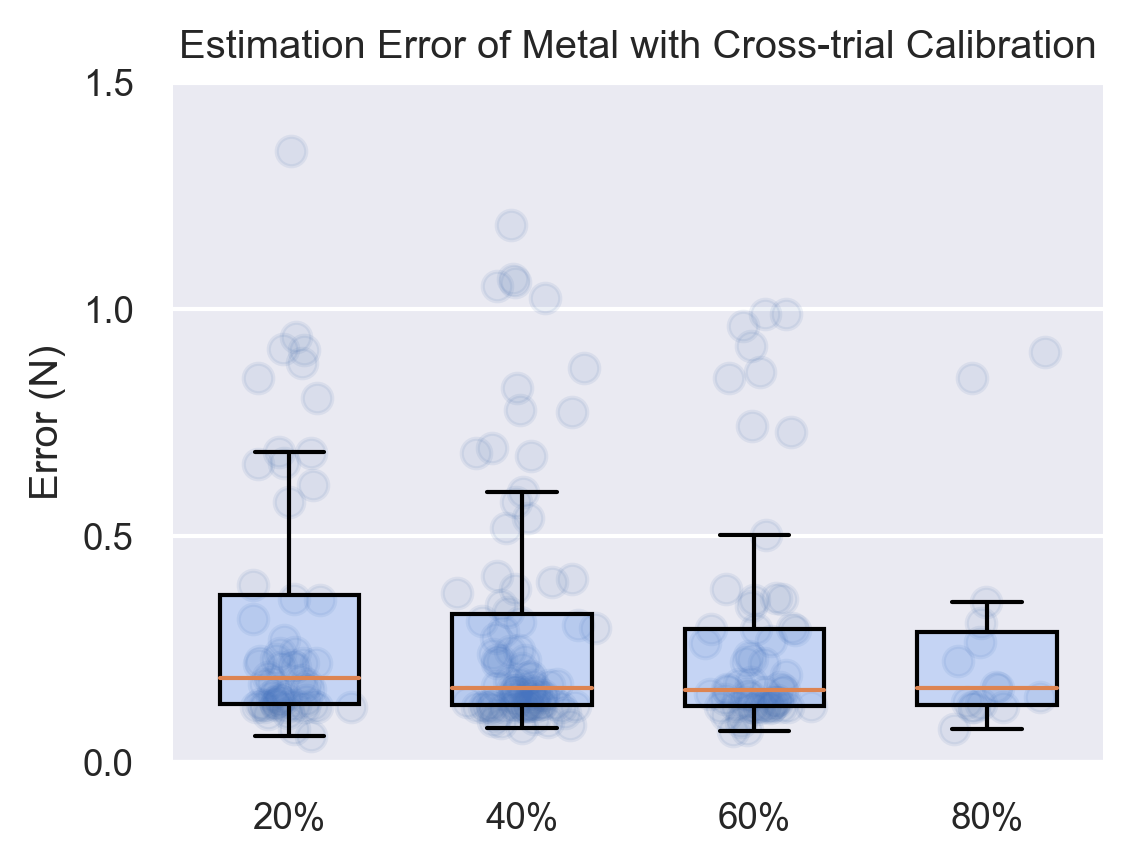

<class 'numpy.ndarray'>
0.01733088369962662 	 0.13790530487975733


In [45]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m
vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_1_split.pkl'
df_filename2 = './output/cache/cali_1_No_2_split.pkl'
df_filename3 = './output/cache/cali_1_No_3_split.pkl'

df1 = pd.read_pickle(df_filename1)
df2 = pd.read_pickle(df_filename2)
df3 = pd.read_pickle(df_filename3)
df = pd.concat([df1,df2,df3], ignore_index=True)
    # print(df)
    
vals1=[]
for i, col in enumerate(df1.columns):
    if i % 2!=0:
        continue
    clean_values1 = df1[col].values[~np.isnan(df1[col].values)]
    vals1.append(clean_values1)
    
vals2=[]
for i, col in enumerate(df2.columns):
    if i % 2!=0:
        continue
    clean_values2 = df2[col].values[~np.isnan(df2[col].values)]
    vals2.append(clean_values2)
    
vals3=[]
for i, col in enumerate(df3.columns):
    if i % 2!=0:
        continue
    clean_values3 = df3[col].values[~np.isnan(df3[col].values)]
    vals3.append(clean_values3)
    
    
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    clean_values = df[col].values[~np.isnan(df[col].values)]
    vals.append(clean_values)
    
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error of Metal with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_metal.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  

df_filename = './output/figures/cali_1_metal.csv'
df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals1:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

## plastic


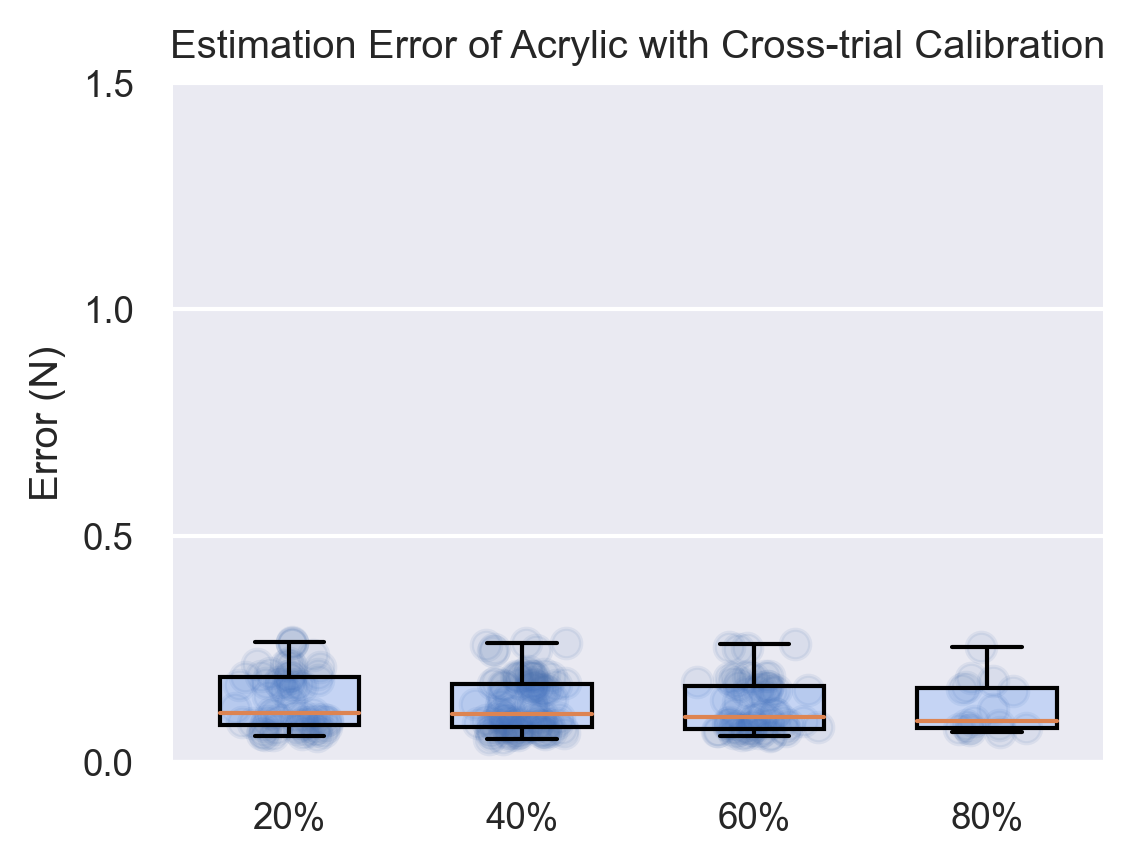

<class 'numpy.ndarray'>
0.057924507181789375 	 0.12834284021277848


In [26]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m
vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_4_split.pkl'
df_filename2 = './output/cache/cali_1_No_5_split.pkl'
df_filename3 = './output/cache/cali_1_No_6_split.pkl'

df1 = pd.read_pickle(df_filename1)
df2 = pd.read_pickle(df_filename2)
df3 = pd.read_pickle(df_filename3)
df = pd.concat([df1,df2,df3], ignore_index=True)
    # print(df)
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    vals.append(df[col].values[~np.isnan(df[col].values)])
    clean_values = df[col].values[~np.isnan(df[col].values)]
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error of Acrylic with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_acrylic.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_1_acrylic.csv'
df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

## wood

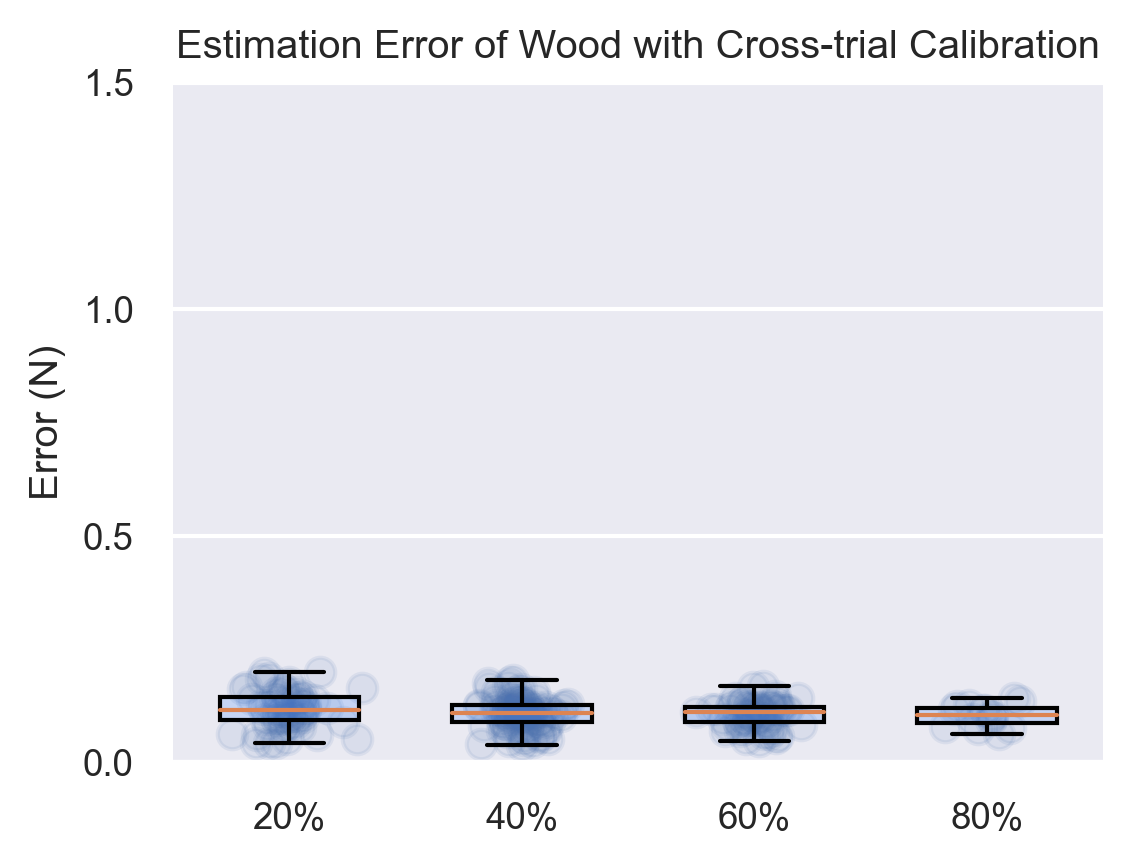

<class 'numpy.ndarray'>
0.032709218736820124 	 0.10970850405535953


In [27]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m

vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_7_split.pkl'
df_filename2 = './output/cache/cali_1_No_8_split.pkl'
df_filename3 = './output/cache/cali_1_No_9_split.pkl'
df1 = pd.read_pickle(df_filename1)
df2 = pd.read_pickle(df_filename2)
df3 = pd.read_pickle(df_filename3)
df = pd.concat([df1,df2,df3], ignore_index=True)
    # print(df)
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    vals.append(df[col].values[~np.isnan(df[col].values)])
    clean_values = df[col].values[~np.isnan(df[col].values)]
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error of Wood with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_wood.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_1_wood.csv'
# df.to_csv(df_filename) 


everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

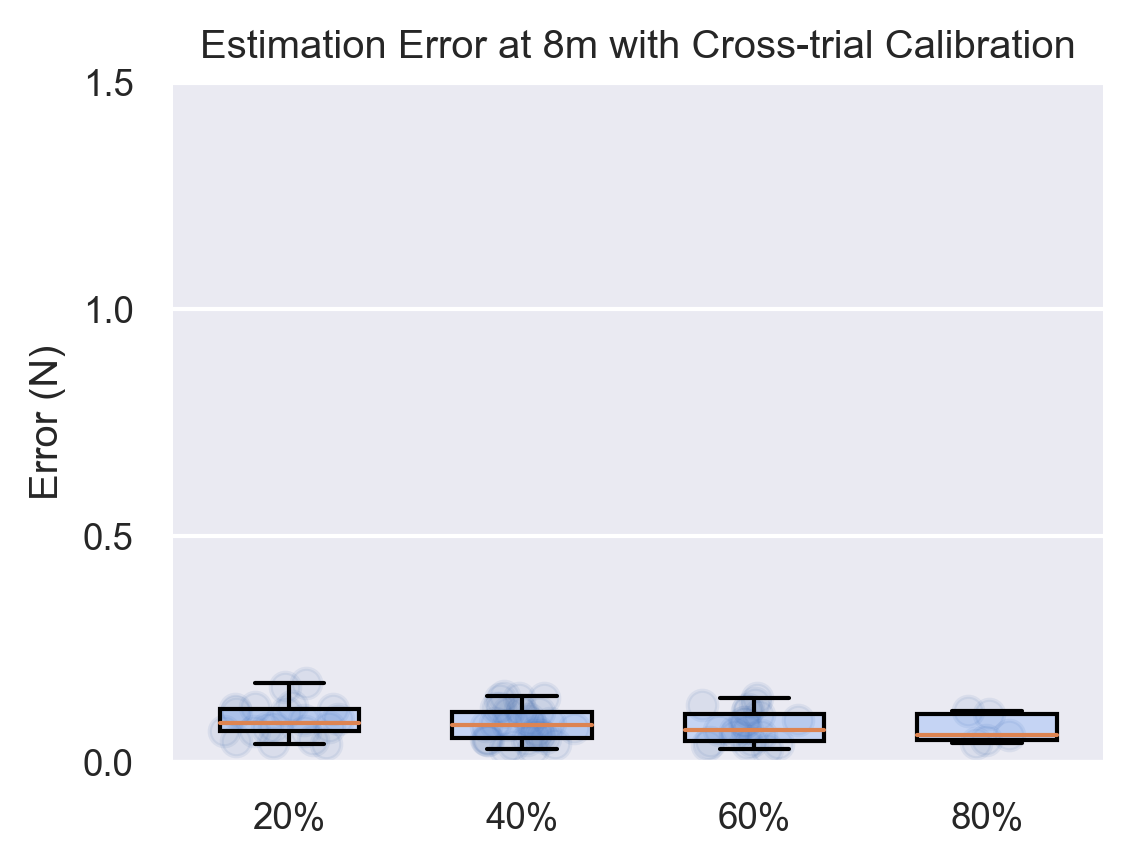

<class 'numpy.ndarray'>
0.03537288888147507 	 0.0841843913583678


In [33]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m

vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_22_split.pkl'
df = pd.read_pickle(df_filename1)
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    vals.append(df[col].values[~np.isnan(df[col].values)])
    clean_values = df[col].values[~np.isnan(df[col].values)]
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error at 8m with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_8m.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_1_8m.csv'
# df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

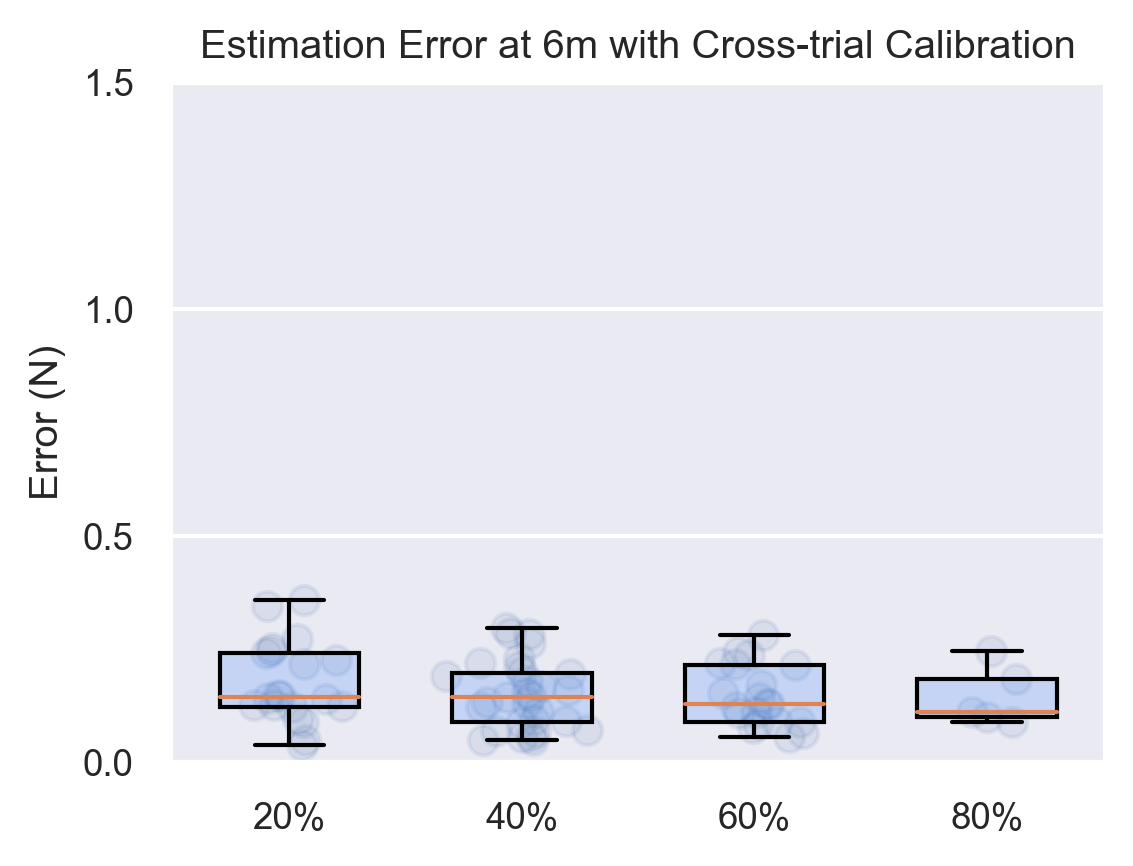

<class 'numpy.ndarray'>
0.07588584361878534 	 0.15607488530063957


In [34]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m

vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_23_split.pkl'
df = pd.read_pickle(df_filename1)
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    vals.append(df[col].values[~np.isnan(df[col].values)])
    clean_values = df[col].values[~np.isnan(df[col].values)]
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error at 6m with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_6m.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_1_6m.csv'
# df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

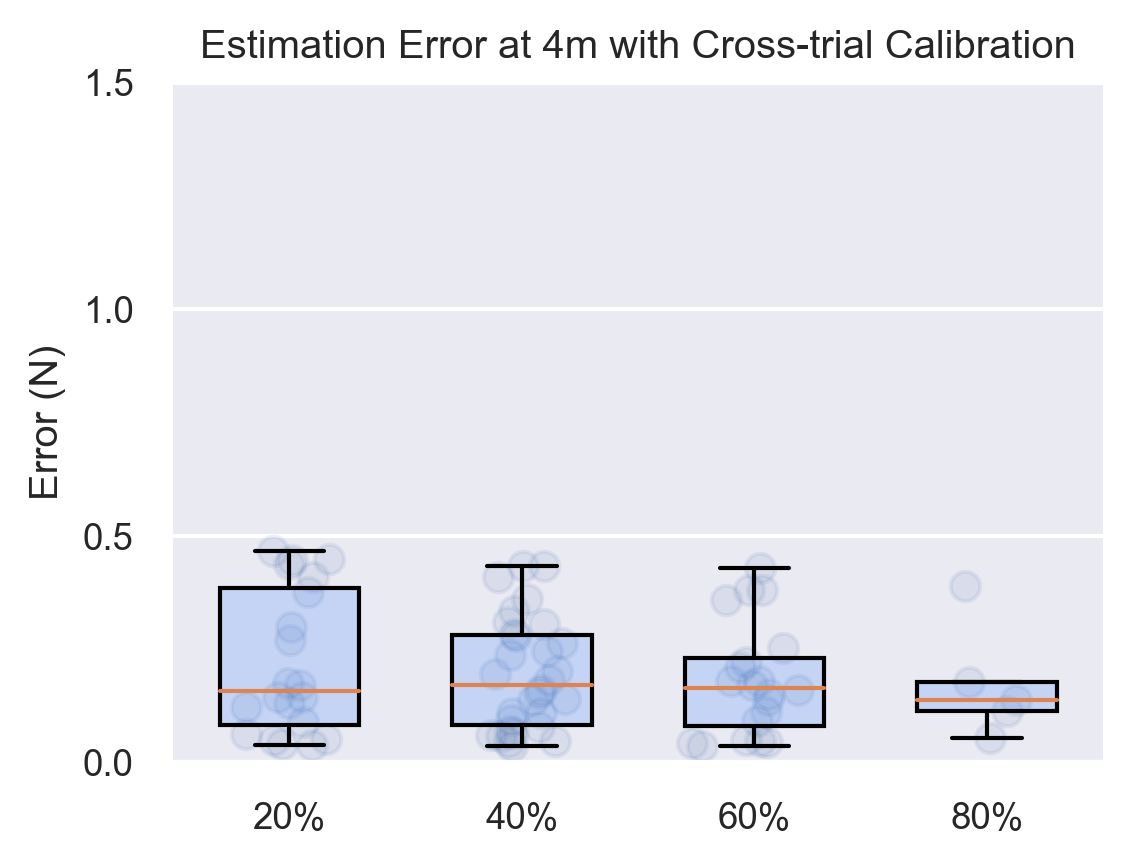

<class 'numpy.ndarray'>
0.13139637556512926 	 0.19627182713047184


In [35]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m

vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_24_split.pkl'
df = pd.read_pickle(df_filename1)
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    vals.append(df[col].values[~np.isnan(df[col].values)])
    clean_values = df[col].values[~np.isnan(df[col].values)]
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error at 4m with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_4m.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_1_4m.csv'
# df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

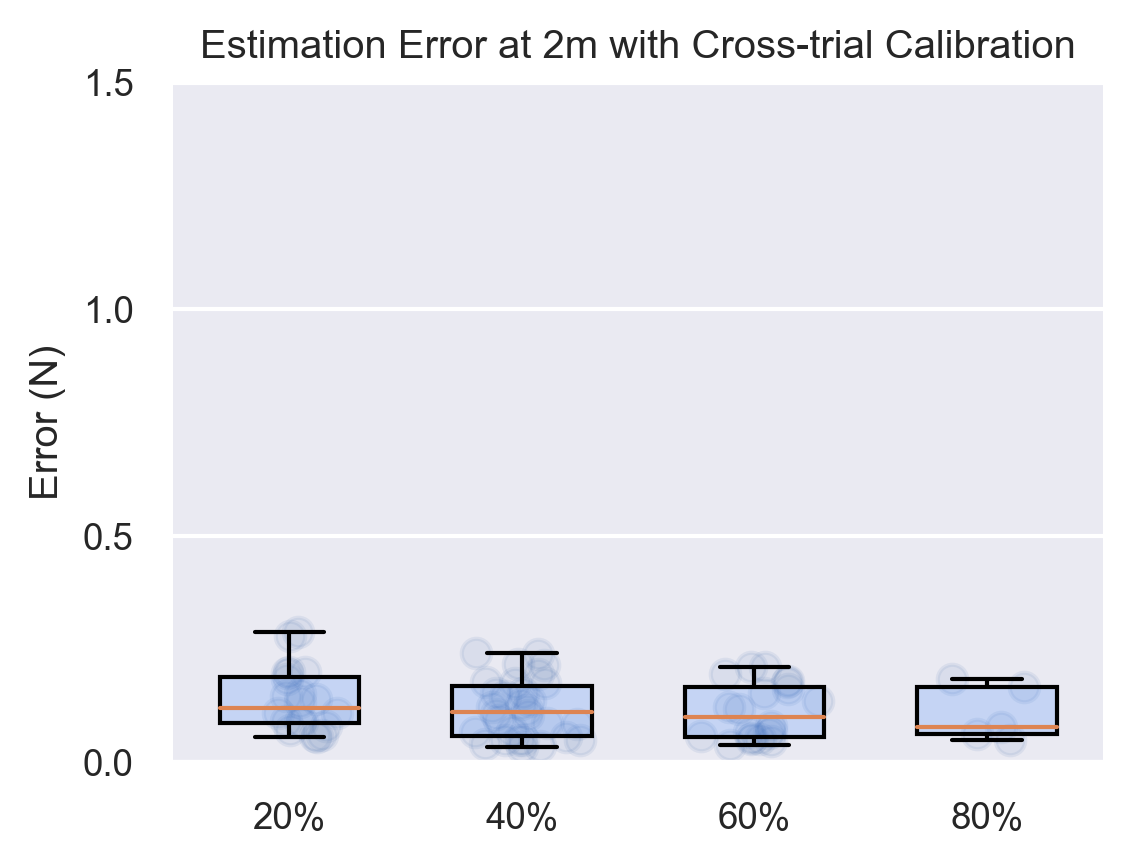

<class 'numpy.ndarray'>
0.06359089068319947 	 0.12116797151095333


In [36]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m

vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_1_No_25_split.pkl'
df = pd.read_pickle(df_filename1)
for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    vals.append(df[col].values[~np.isnan(df[col].values)])
    clean_values = df[col].values[~np.isnan(df[col].values)]
#     print('vals',len(clean_values))
    xs.append(np.random.normal(int(i/2) + 1, 0.1, clean_values.shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error at 2m with Cross-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([0,1.5]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_1_2m.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_1_2m.csv'
# df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

# calibration 2

In [ ]:
# type in your Experiment No
# 1 metal thin, 2 metal medium, 3 metal thick.
# 4 plastic thin, 5 pls med, 6 pls thick
# 7 wood THICK, 8 med, 9 THIN
# 22 8m, 23 6m, 24 4m, 25 2m

In [89]:
# merge the 5 trials. #1,3,4 not complete
ExpNo = str(2)
vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_2_No_'+ExpNo+'_1_prospect.pkl'
df_filename2 = './output/cache/cali_2_No_'+ExpNo+'_2_prospect.pkl'
df_filename3 = './output/cache/cali_2_No_'+ExpNo+'_3_prospect.pkl'
df_filename4 = './output/cache/cali_2_No_'+ExpNo+'_4_prospect.pkl'
df_filename5 = './output/cache/cali_2_No_'+ExpNo+'_5_prospect.pkl'
df1 = pd.read_pickle(df_filename1)
df2 = pd.read_pickle(df_filename2)
df3 = pd.read_pickle(df_filename3)
df4 = pd.read_pickle(df_filename4)
df5 = pd.read_pickle(df_filename5)
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    clean_values = df[col].values[~np.isnan(df[col].values)]
    vals.append(clean_values[::100])
print(len(vals),len(vals[0]))
df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  

df_filename = './output/figures/cali_2_No_'+ExpNo+'_prospect.csv'
df.to_csv(df_filename) 

4 96


1 1
2 2
3 3
4 4
5 5


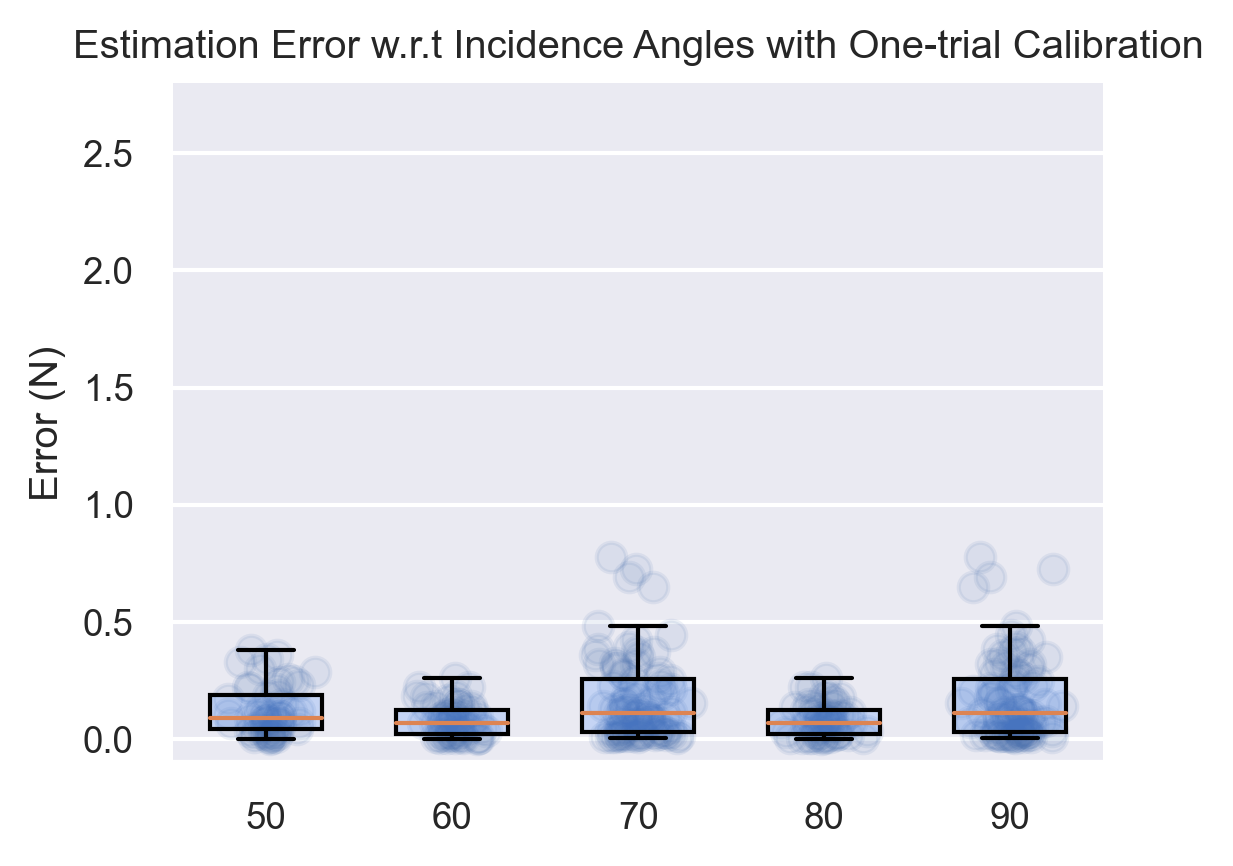

<class 'numpy.ndarray'>
0.14207092238381233 	 0.13298669137674163


In [32]:
# Incidence Angles
material = 'Incidence Angles'
vals, names, xs = [],[],[]
df_filename1 = './output/figures/cali_2_No_17_prospect.csv'
df_filename2 = './output/figures/cali_2_No_18_prospect.csv'
df_filename3 = './output/figures/cali_2_No_19_prospect.csv'
df_filename2 = './output/figures/cali_2_No_20_prospect.csv'
df_filename3 = './output/figures/cali_2_No_2_prospect.csv'
df1 = pd.read_csv(df_filename1,index_col=0)
df2 = pd.read_csv(df_filename2,index_col=0)
df3 = pd.read_csv(df_filename3,index_col=0)
df4 = pd.read_csv(df_filename2,index_col=0)
df5 = pd.read_csv(df_filename3,index_col=0)
# df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
count = 0
for df in [df1,df2,df3,df4,df5]:
    all_col = []
    for i, col in enumerate(df.columns):
        clean_values = df[col].values[~np.isnan(df[col].values)][::5].tolist()
        all_col = all_col + clean_values
        #     print('vals',len(clean_values))
    xs.append(np.random.normal(count + 1, 0.1, len(all_col))) 
    vals.append(np.array(all_col))
    count += 1
#     print(len(xs[0]),len(vals[0]))
    print(len(xs),len(vals))

names = ['50','60','70','80','90']
fig, ax = plt.subplots(figsize = (4,3))
# vals_sparse = [vals[i][::100] for i in range(4)]
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error w.r.t '+material+' with One-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([-0.1,2.8]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_2_'+material+'.svg')
plt.show()

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

122 122
4 4


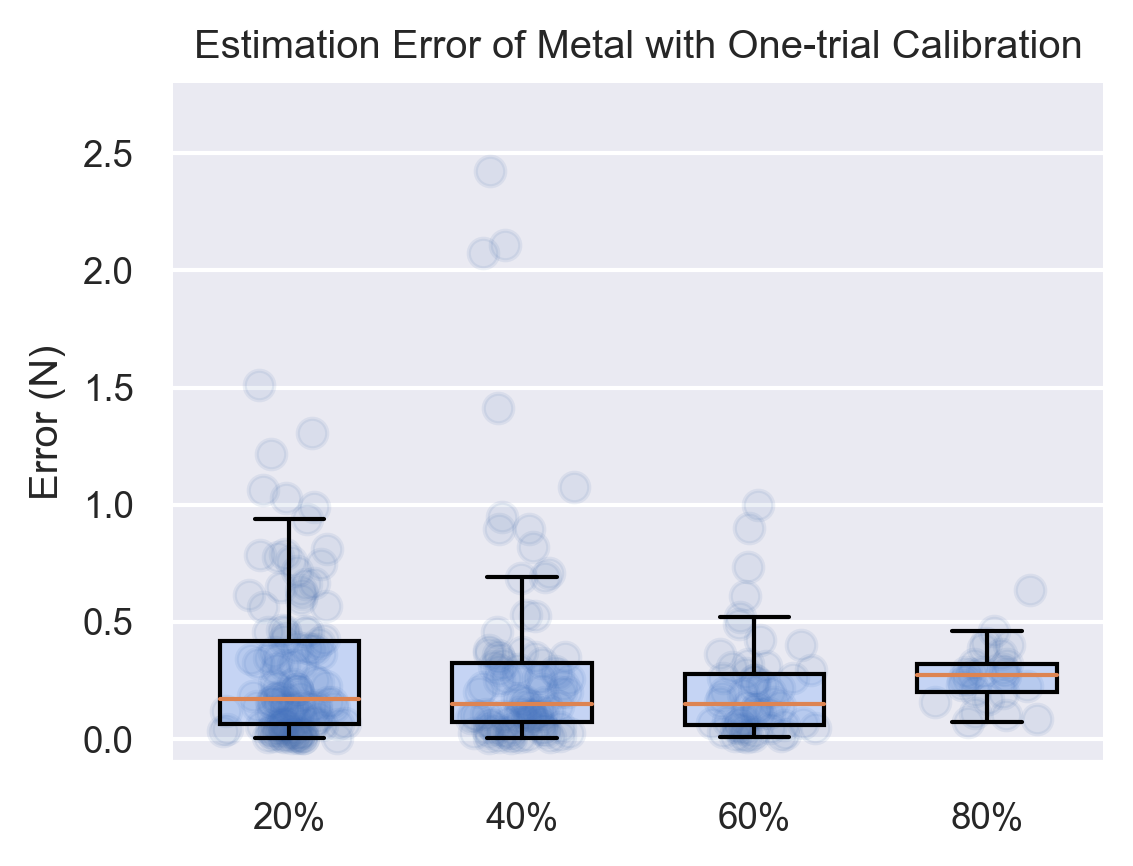

<class 'numpy.ndarray'>
0.3319257804728512 	 0.2783679195054372


In [29]:
# metal
material = 'Metal'
vals, names, xs = [],[],[]
df_filename1 = './output/figures/cali_2_No_1_prospect.csv'
df_filename2 = './output/figures/cali_2_No_2_prospect.csv'
df_filename3 = './output/figures/cali_2_No_3_prospect.csv'
df1 = pd.read_csv(df_filename1,index_col=0)
df2 = pd.read_csv(df_filename2,index_col=0)
df3 = pd.read_csv(df_filename3,index_col=0)
df = pd.concat([df1,df2,df3], ignore_index=True)
for i, col in enumerate(df.columns):
    clean_values = df[col].values[~np.isnan(df[col].values)][::2]
    vals.append(clean_values)
    #     print('vals',len(clean_values))
    xs.append(np.random.normal(i + 1, 0.1, clean_values.shape[0])) 
print(len(xs[0]),len(vals[0]))
print(len(xs),len(vals))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
# vals_sparse = [vals[i][::100] for i in range(4)]
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error of '+material+' with One-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([-0.1,2.8]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_2_'+material+'.svg')
plt.show()

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

126 126
4 4


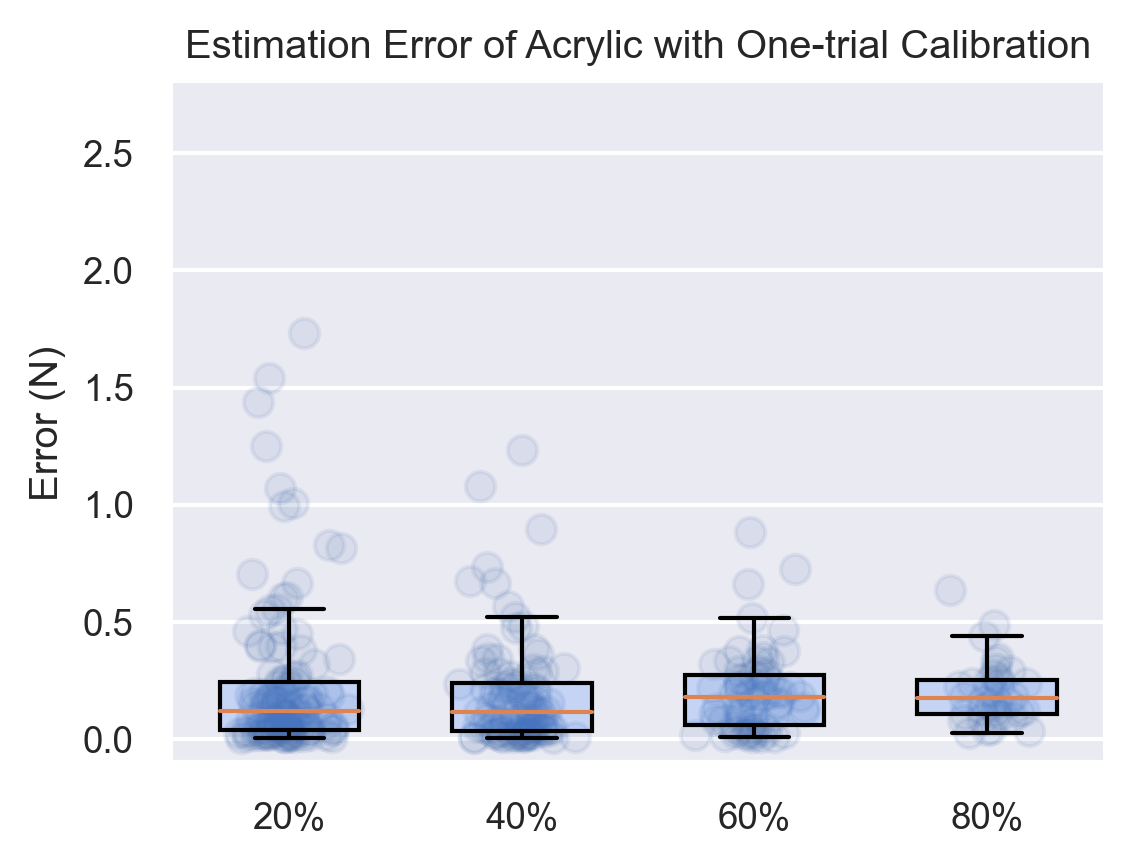

<class 'numpy.ndarray'>
0.2502429236716002 	 0.20576928899677555


In [30]:
# acrylic
material = 'Acrylic'
vals, names, xs = [],[],[]
df_filename1 = './output/figures/cali_2_No_4_prospect.csv'
df_filename2 = './output/figures/cali_2_No_5_prospect.csv'
df_filename3 = './output/figures/cali_2_No_6_prospect.csv'
df1 = pd.read_csv(df_filename1,index_col=0)
df2 = pd.read_csv(df_filename2,index_col=0)
df3 = pd.read_csv(df_filename3,index_col=0)
df = pd.concat([df1,df2,df3], ignore_index=True)
for i, col in enumerate(df.columns):
    clean_values = df[col].values[~np.isnan(df[col].values)][::4]
    vals.append(clean_values)
    #     print('vals',len(clean_values))
    xs.append(np.random.normal(i + 1, 0.1, clean_values.shape[0])) 
print(len(xs[0]),len(vals[0]))
print(len(xs),len(vals))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
# vals_sparse = [vals[i][::100] for i in range(4)]
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error of '+material+' with One-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([-0.1,2.8]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_2_'+material+'.svg')
plt.show()

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

109 109
4 4


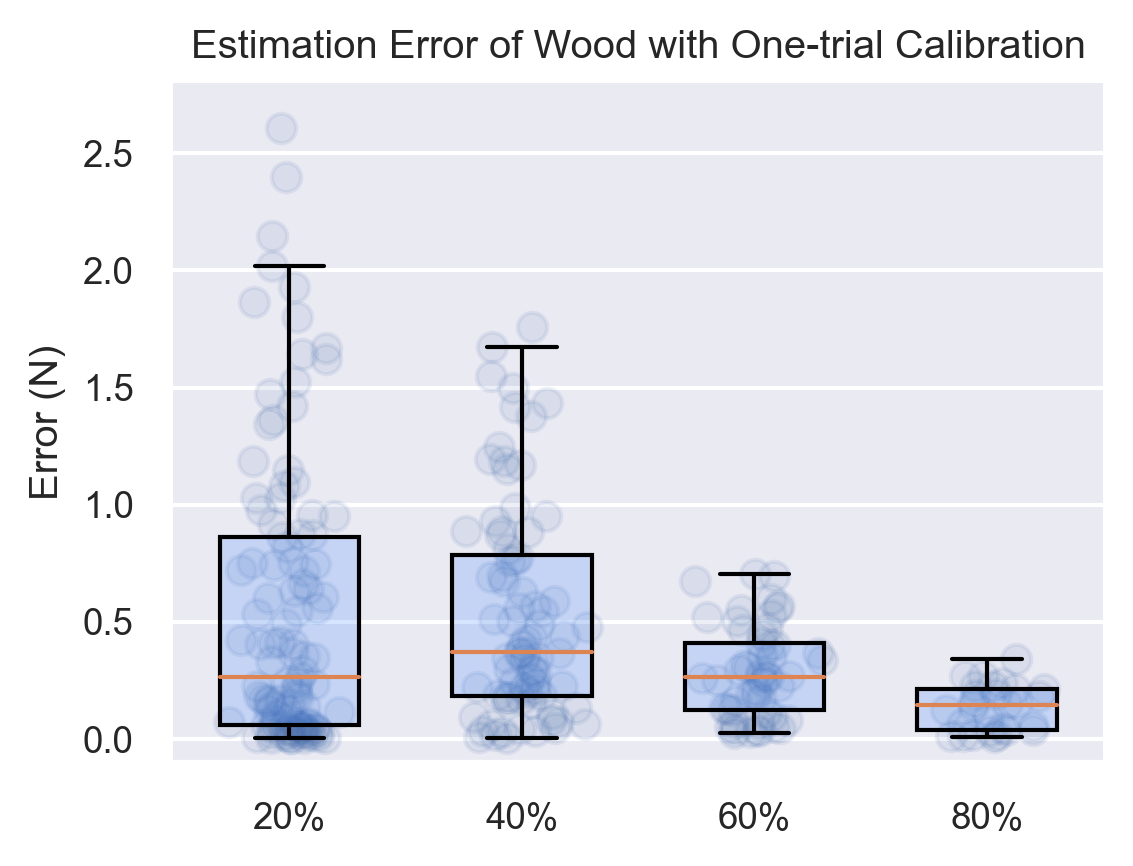

<class 'numpy.ndarray'>
0.4884132275943543 	 0.44518054841888394


In [31]:
# wood
material = 'Wood'
vals, names, xs = [],[],[]
df_filename1 = './output/figures/cali_2_No_7_prospect.csv'
df_filename2 = './output/figures/cali_2_No_8_prospect.csv'
df_filename3 = './output/figures/cali_2_No_9_prospect.csv'
df1 = pd.read_csv(df_filename1,index_col=0)
df2 = pd.read_csv(df_filename2,index_col=0)
df3 = pd.read_csv(df_filename3,index_col=0)
df = pd.concat([df1,df2,df3], ignore_index=True)
for i, col in enumerate(df.columns):
    clean_values = df[col].values[~np.isnan(df[col].values)][::4]
    vals.append(clean_values)
    #     print('vals',len(clean_values))
    xs.append(np.random.normal(i + 1, 0.1, clean_values.shape[0])) 
print(len(xs[0]),len(vals[0]))
print(len(xs),len(vals))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
# vals_sparse = [vals[i][::100] for i in range(4)]
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error of '+material+' with One-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([-0.1,2.8]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
plt.savefig('./output/figures/cali_2_'+material+'.svg')
plt.show()

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

4 14813


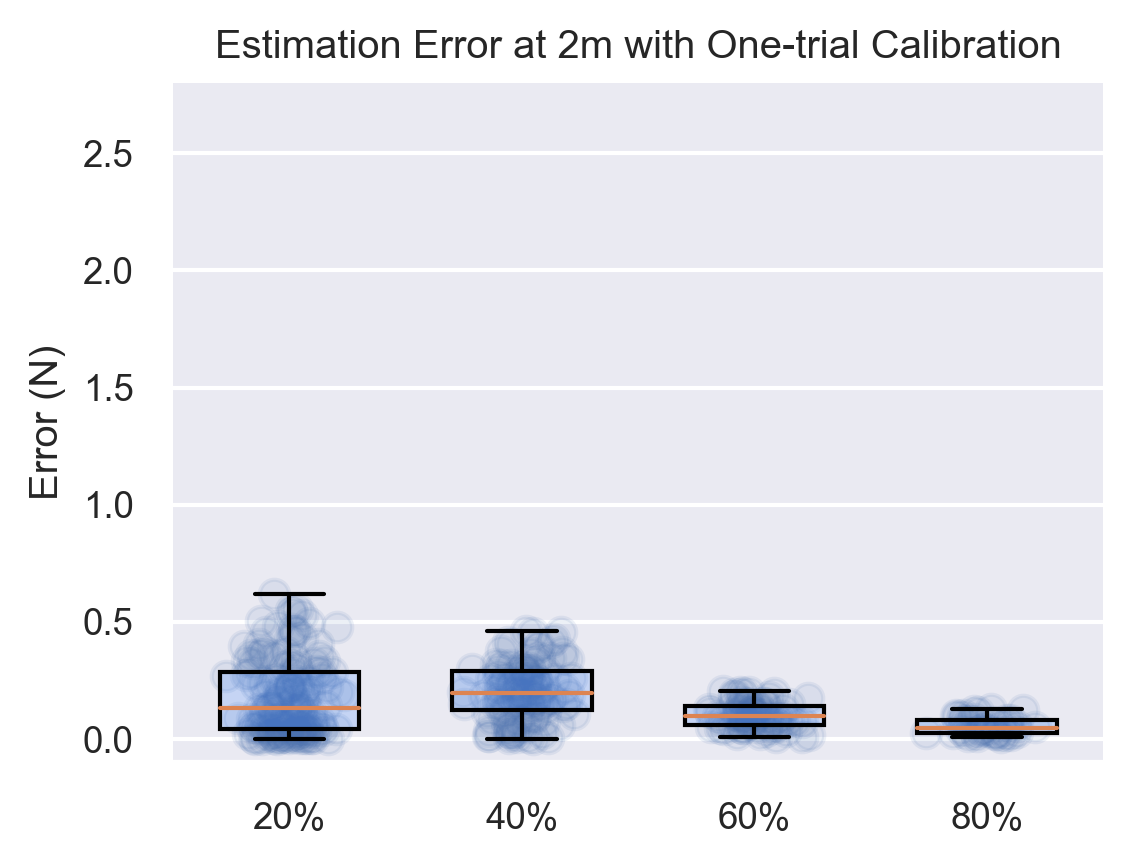

<class 'numpy.ndarray'>
0.13061349579130624 	 0.15821648104090225


In [41]:
# merge the 5 trials. #1,3,4 not complete
# super long distance measurements
ExpNo = str(25)
num = 2 #m
vals, names, xs = [],[],[]
df_filename1 = './output/cache/cali_2_No_'+ExpNo+'_1_prospect.pkl'
df_filename2 = './output/cache/cali_2_No_'+ExpNo+'_2_prospect.pkl'
df_filename3 = './output/cache/cali_2_No_'+ExpNo+'_3_prospect.pkl'
df_filename4 = './output/cache/cali_2_No_'+ExpNo+'_4_prospect.pkl'
df_filename5 = './output/cache/cali_2_No_'+ExpNo+'_5_prospect.pkl'
df1 = pd.read_pickle(df_filename1)
df2 = pd.read_pickle(df_filename2)
df3 = pd.read_pickle(df_filename3)
df4 = pd.read_pickle(df_filename4)
df5 = pd.read_pickle(df_filename5)
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

for i, col in enumerate(df.columns):
    if i % 2!=0:
        continue
    clean_values = df[col].values[~np.isnan(df[col].values)]
    vals.append(clean_values)
print(len(vals),len(vals[0]))
df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_2_No_'+ExpNo+'_prospect.csv'
# df.to_csv(df_filename) 


vals, names, xs = [],[],[]

for i, col in enumerate(df.columns):
    clean_values = df[col].values[~np.isnan(df[col].values)]
    vals.append(clean_values[::100])
    #     print('vals',len(clean_values))
    xs.append(np.random.normal(i + 1, 0.1, clean_values[::100].shape[0])) 
# print(len(vals[0]))
# print(len(xs[0]),len(vals[0]))
names = ['20%','40%','60%','80%']
fig, ax = plt.subplots(figsize = (4,3))
# vals_sparse = [vals[i][::100] for i in range(4)]
ax.boxplot(vals,patch_artist=True, showfliers=False, widths = 0.6,labels=names,
           boxprops = dict(linewidth=1,facecolor=(0.2,0.5,1,0.2)),
           medianprops = dict(linewidth=1),whiskerprops = dict(linewidth=1),
          capprops = dict(linewidth=1))
for x, val in zip(xs, vals):
    ax.scatter(x, val, alpha=0.1, color='b',s=50)
ax.set_title ('Estimation Error at '+str(num)+'m with One-trial Calibration')
# ax.set_xlabel ('Train Trials Percentage of All Trials (%)')
ax.set_ylabel ('Error (N)') 
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.set_ylim ([-0.1,2.8]) 
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.set_style("whitegrid")
sns.despine(left = True)
# ax.set_xticks(range(0,6,1))
# ax.set_xticklabels([20,40,60,80])
sns.set(font_scale=0.8)
# plt.savefig('./output/figures/cali_2_'+str(num)+'m.svg')
plt.show()

df = pd.DataFrame()
df.loc[:,'20%'] = pd.Series(vals[0])  
df.loc[:,'40%'] = pd.Series(vals[1]) 
df.loc[:,'60%'] = pd.Series(vals[2])  
df.loc[:,'80%'] = pd.Series(vals[3])  
df_filename = './output/figures/cali_2_'+str(num)+'m.csv'
# df.to_csv(df_filename) 

everything=[]
# print(len(vals))
for item in vals:
    for l in item:
        everything.append(l)
everything = np.array(everything)
print(type(everything))
print(np.std(everything),'\t',np.mean(everything))

# For your reference, this is how I generate the dataframe

In [ ]:
###calibration 1
def integration_linear_split(ExpNo, X, Y):
    
    df = pd.DataFrame(index=range(30))
    for n_train in range(1,5):
        comb = combinations(range(1,6), n_train)
        comb =[i for i in comb]
        error_values_test = np.zeros((len(comb),5-n_train))
        r2s_test = np.zeros((len(comb),5-n_train))
        for j in range(0,len(comb)):# the j-th combination of n_train trials
            # data preparation
            for k in range(n_train): # the k-th trial in the j-th combination
                idx = comb[j][k]
                if (ExpNo==22 or ExpNo==23 or ExpNo==24 or ExpNo==25 or ExpNo == 26):
                    force_start = (np.abs(Y[str(idx)+'_trial'] - 0.2)).argmin()
                else:
                    force_start = find_starting_point(Y[str(idx)+'_trial'])
                    force_start = max(0,force_start-50)
                print('force_start',force_start)
                if k == 0:  
                    Y_train = Y[str(idx)+'_trial'][force_start:]
                    X_train = X[str(idx)+'_trial'][force_start:]
                else:
                    Y_train_new = Y[str(idx)+'_trial'][force_start:]
                    X_train_new = X[str(idx)+'_trial'][force_start:]
                    Y_train = np.concatenate((Y_train, Y_train_new), axis=0)
                    X_train = np.concatenate((X_train, X_train_new), axis=0)
            # train
            Regressor = np.poly1d(np.polyfit(X_train, Y_train, 1))
            Y_pred_train = Regressor(X_train)
            print(Regressor)
            
            # test
            counter = 0
            for test in range(1,6):
                if test in comb[j]:
                    continue
                # test
                if (ExpNo==22 or ExpNo==23 or ExpNo==24 or ExpNo==25 or ExpNo == 26):
                    force_start = (np.abs(Y[str(idx)+'_trial'] - 0.2)).argmin()
                else:
                    force_start = find_starting_point(Y[str(test)+'_trial'])
                    force_start = max(0,force_start-50)
                X_test = X[str(test)+'_trial'][force_start:]
                Y_test = Y[str(test)+'_trial'][force_start:]
                Y_pred_test = Regressor(X_test)  # make predictions

    #             error = abs(Y_pred_test-Y_test)/Y_test
                error_value = abs(Y_pred_test-Y_test)
                error_value_avg = np.mean(error_value)
                error_values_test[j][counter] = error_value_avg
                r2s_test[j][counter] = r2_score(Y_test, Y_pred_test)
                print('==============='+str(counter)+'===============')
                print('train on '+str(n_train)+' combination: '+str(comb[j])+' and test on '+str(test))
                
                fig, ax = plt.subplots(2,1,figsize = (7,10))
                ax[0].scatter(Y_test, X_test, color='blue')
                ax[0].scatter(Y_train, X_train, color='green')
                ax[0].plot(Y_pred_test,X_test, color='red')
    #             ax[0].set_xlim([0,5])
                ax[1].plot(Y_test,error_value, color='green')
                ax[1].set_title('Estimation error over force')
                ax[1].set_xlabel('Force(N)')
                ax[1].set_ylabel('Error(N)')
                ax[1].set_ylim([0,5])
                plt.show()
                counter+=1
        error_values_test = error_values_test.reshape(-1)
        r2s_test = r2s_test.reshape(-1)
        df.loc[:,'err_'+str(n_train)] = pd.Series(error_values_test)
        df.loc[:,'r2_'+str(n_train)] = pd.Series(r2s_test)   
    df_filename = './output/cache/cali_1_No_'+str(ExpNo)+'_split.pkl'
    df.to_pickle(df_filename) 
    return df_filename

df_filename = integration_linear_split(ExpNo, X, Y)

In [ ]:
###calibration 2
def integration_linear_prospect(ExpNo, X, Y, idx): # calibration method 2
    # idx, the trial we use to train and test
    if (ExpNo==22 or ExpNo==23 or ExpNo==24 or ExpNo==25 or ExpNo == 26):
        force_start = (np.abs(Y[str(idx)+'_trial'] - 0.2)).argmin()
    else:
        force_start = find_starting_point(Y[str(idx)+'_trial']) 
        force_start = max(0,force_start-50)
    df = pd.DataFrame(index=range(force_end-force_start+50))
    for target in range(1,5):
        # data preparation
        force_target = (np.abs(Y[str(idx)+'_trial'] - target)).argmin()
        
        Y_train = Y[str(idx)+'_trial'][force_start:force_target]
        X_train = X[str(idx)+'_trial'][force_start:force_target]
        
        # train
        Regressor = np.poly1d(np.polyfit(X_train, Y_train, 1))
        Y_pred_train = Regressor(X_train)
        print(Regressor)
            
        # test
        X_test = X[str(idx)+'_trial'][force_target:]
        Y_test = Y[str(idx)+'_trial'][force_target:]
        Y_pred_test = Regressor(X_test)  # make predictions

        error_value = abs(Y_pred_test-Y_test)
        r2 = r2_score(Y_test, Y_pred_test)
        print('======================================')
        print('train on 0-'+str(target)+'N, and test on '+str(target)+' to 5N')

        fig, ax = plt.subplots(2,1,figsize = (7,10))
        ax[0].scatter(Y_test, X_test, color='blue')
        ax[0].scatter(Y_train, X_train, color='green')
        ax[0].plot(Y_pred_test,X_test, color='red')
#             ax[0].set_xlim([0,5])
        ax[1].plot(Y_test,error_value, color='green')
        ax[1].set_title('Estimation error over force')
        ax[1].set_xlabel('Force(N)')
        ax[1].set_ylabel('Error(N)')
        ax[1].set_ylim([0,5])
        plt.show()

        df.loc[:,'err_'+str(target)] = pd.Series(error_value)
        df.loc[:,'r2_'+str(target)] = pd.Series(r2)   
        
    df_filename = './output/cache/cali_2_No_'+str(ExpNo)+'_'+str(idx)+'_prospect.pkl'
    df.to_pickle(df_filename) 
    return df_filename


for trial in range(1,6):
    df_filename = integration_linear_prospect(ExpNo, X, Y, trial)